# Looking at Prices for Houses
What's going to be the biggest driver for how much a house costs?

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv("/Users/Grant/Documents/DataMining/ProjectStuff/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
df.shape

(545, 13)

# Getting numerical columns

In [48]:
num_cols= df._get_numeric_data().columns
num_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [49]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [50]:
# create a price per sqft variable = price/area
df['price_per_sqft']= df['price']/df['area']

In [51]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1367.187500
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1537.735849


In [52]:
# We are lucky to not have any null values in the dataset
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price_per_sqft      0
dtype: int64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

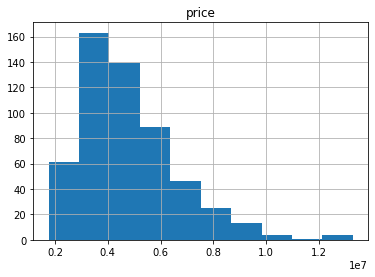

In [53]:
df.hist(column = 'price')
# This histogram shows that price is skewed to the right heavily

In [54]:
df['price'].mean()

4766729.247706422

<AxesSubplot:xlabel='area', ylabel='price'>

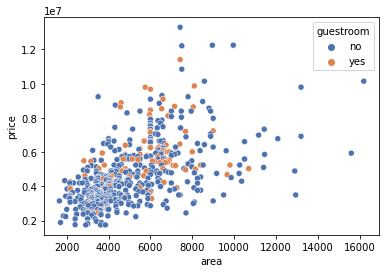

In [55]:
sns.scatterplot(data=df, x="area", y="price", hue = 'guestroom', palette = 'deep')

In [56]:
# Feature engineering the categorical data. First going to look at it
dfcat = df.drop(df._get_numeric_data().columns, axis = 1)
dfcat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


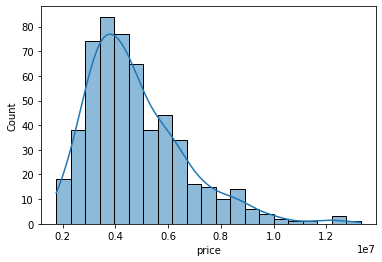

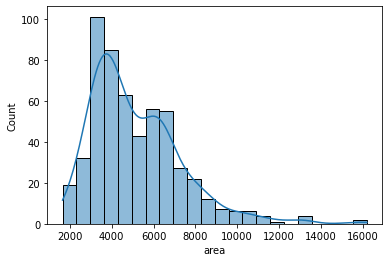

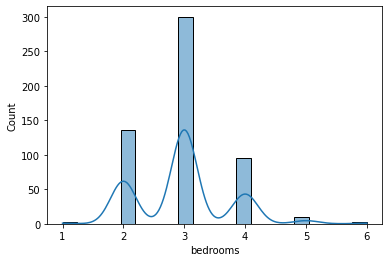

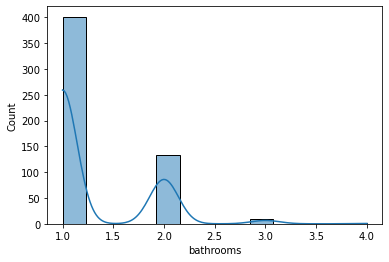

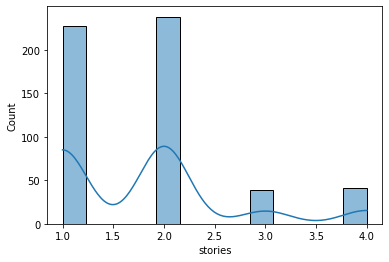

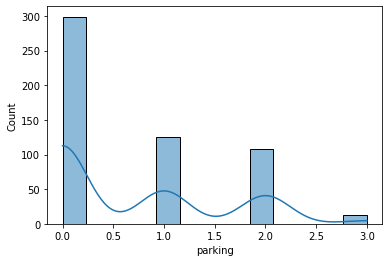

In [57]:
# Histograms for all the numeric data columns
# Should normalize these all later if doing regression
for i in num_cols:
    sns.histplot(data=df, x=i, kde= True)
    plt.show(i)

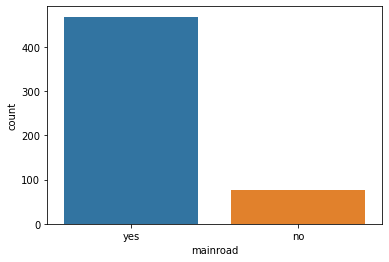

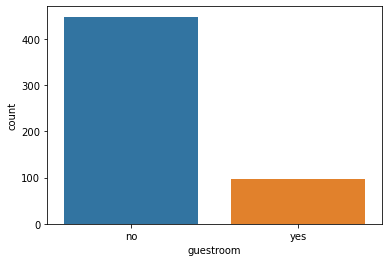

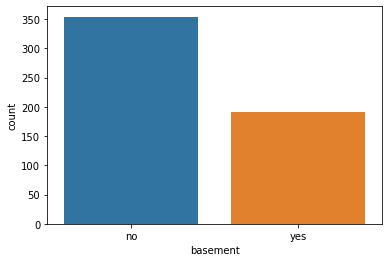

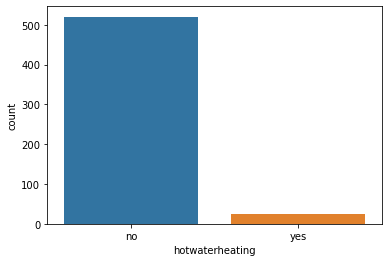

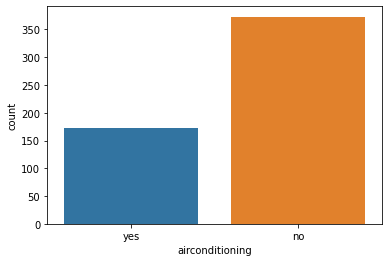

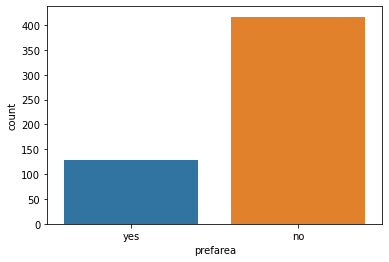

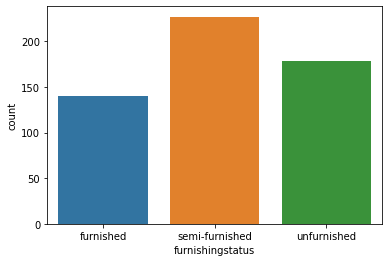

In [58]:
# Barcharts for every column in dfcat
for i in dfcat:
    sns.countplot(data = dfcat, x =i)
    plt.show(i)

In [59]:
# need to change yes to 1, no to 0 in the main dataframe
# Whether or not the house is connected to a main road
df['mainroad'].replace({'yes':1,'no':0}, inplace = True)

# Main dataframe is changed but dfcat is unchanged

In [60]:
df['mainroad'].value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [61]:
dfcat['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [62]:
dfcat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [63]:
# Whether or not the house has at least 1 guest room. Number of bedrooms is specified in this dataset as well
df['guestroom'].value_counts()
df['guestroom'].replace({'no':0,'yes':1}, inplace = True)

In [64]:
# Whether or not the house has a basement
df['basement'].replace({'no':0,'yes':1}, inplace = True)
df['basement'].value_counts()

0    354
1    191
Name: basement, dtype: int64

In [65]:
# Whether or not the house has a waterheater
df['hotwaterheating'].replace({'no':0,'yes':1}, inplace = True)
df['hotwaterheating'].value_counts()

0    520
1     25
Name: hotwaterheating, dtype: int64

In [66]:
# Whether or not the house has airconditioning
# Most of the houses don't, which tells me it's probably not in the US
df['airconditioning'].replace({'no':0,'yes':1}, inplace = True)
df['airconditioning'].value_counts()

0    373
1    172
Name: airconditioning, dtype: int64

In [67]:
# No idea what prefarea is. Maybe it means that the house is in the buyer's prefered area?
df['prefarea'].replace({'no':0,'yes':1}, inplace = True)
df['prefarea'].value_counts()

0    417
1    128
Name: prefarea, dtype: int64

In [68]:
# Furnishing status of the house. If performing regression, I'd make a dummy variable for it
df['furnishingstatus'].replace({'unfurnished':0,'semi-furnished':1,'furnished':2}, inplace = True)
df['furnishingstatus'].value_counts()

1    227
0    178
2    140
Name: furnishingstatus, dtype: int64

# There's an easier way to have done all of that, but yeah

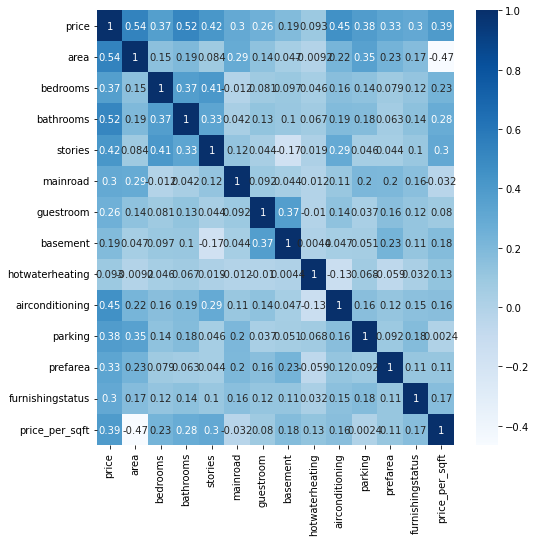

In [82]:
# Heatmap of everything after changing everything to numerical
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

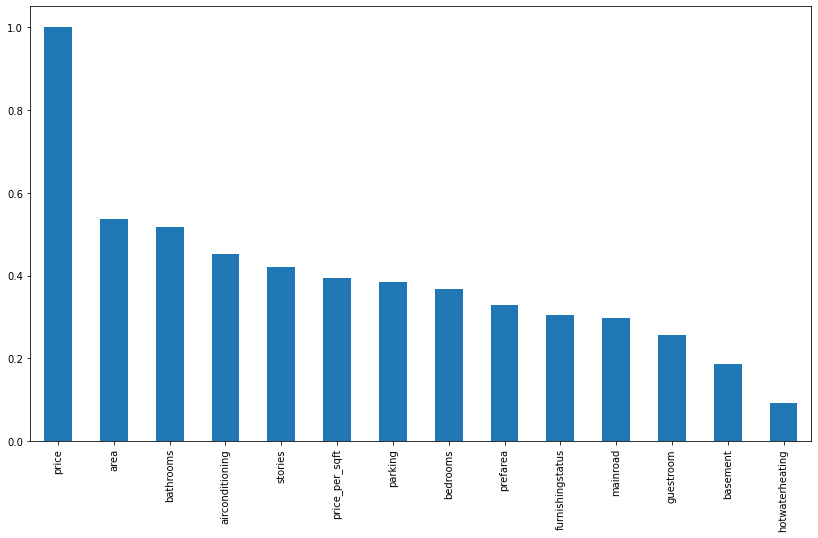

In [70]:
# Another way to look at just how correlated a variable is to the price, either postively or negatively
plt.figure(figsize=(14,8))
bars = df.corr()['price'].sort_values(ascending = False).plot(kind = 'bar')

# From the figure above, we see in descending order which features have the highest correlation to price, with nothing negatively impacting it.
Area has the most positive correlation to the price while whether or not the house has a waterheater has the least. Maybe people don't really care if the house comes without one, since they're usually available for purchase at stores?

In [71]:
# Transposing the describe table makes it easier to read for me
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1.750000e+06,3.430000e+06,4.340000e+06,5.740000e+06,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1.650000e+03,3.600000e+03,4.600000e+03,6.360000e+03,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0


In [72]:
# make some histograms of all the data and make pretty colors in seaborn

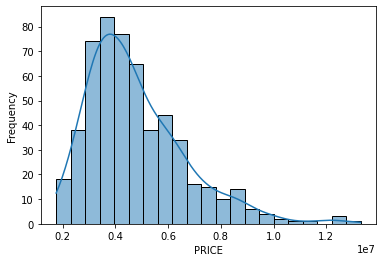

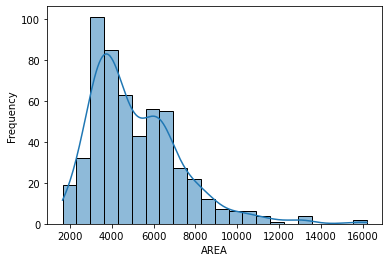

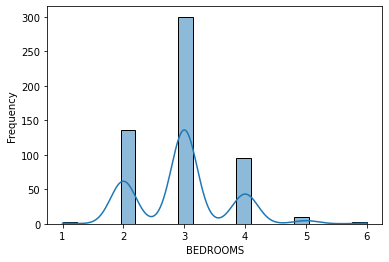

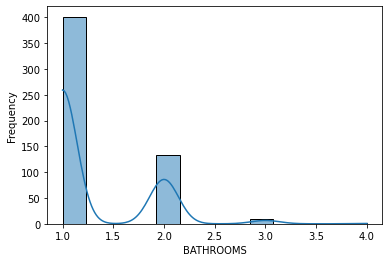

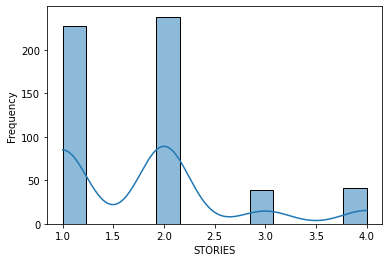

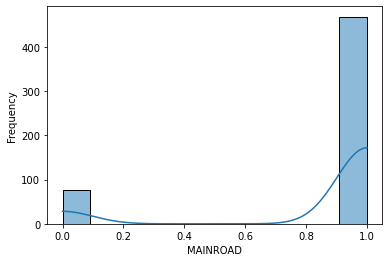

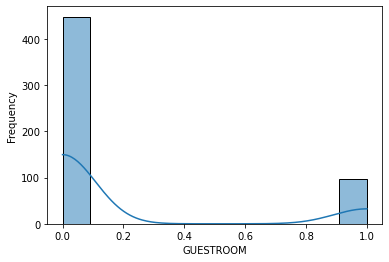

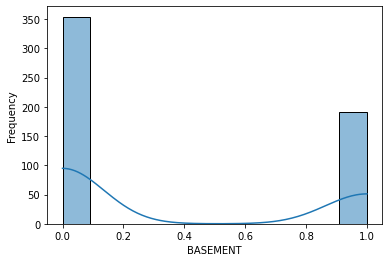

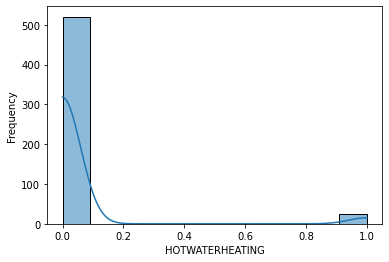

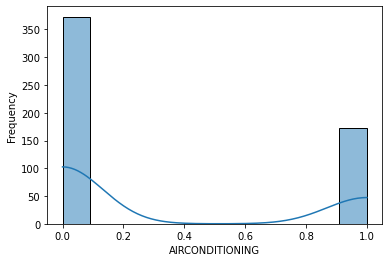

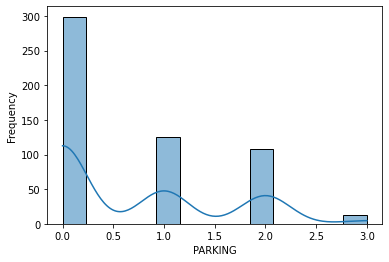

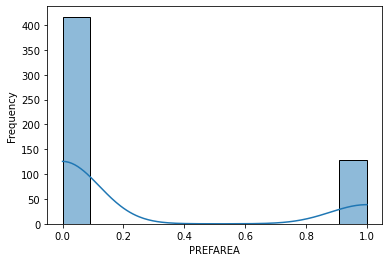

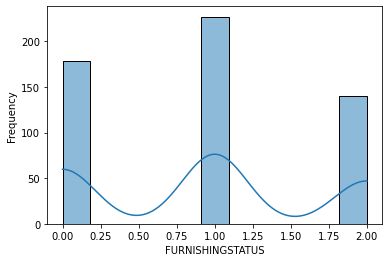

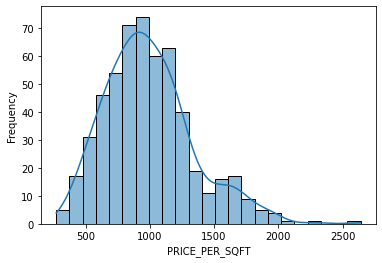

In [73]:
for i in df:
    sns.histplot(data=df, x=i, kde= True)
    plt.xlabel(i.upper(), fontsize = '10')
    plt.ylabel('Frequency', fontsize = '10')
    plt.show(i)

<AxesSubplot:xlabel='area', ylabel='price'>

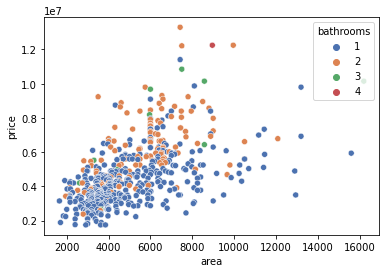

In [77]:
sns.scatterplot(data=df, x="area", y="price", hue = 'bathrooms', palette = 'deep')